In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### Importing the dataset

In [2]:
# Import IRIS dataset
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data)

In [4]:
df.columns = iris.feature_names

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Standardization

In [6]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
x_scaled = scaler.fit_transform(df)

In [8]:
x_scaled.shape

(150, 4)

In Above datset we have 4 columns means four dimension now we need to generate the dataset in two dimension 
so we use dimensionly reduction (PCA)

### Apply PCA

In [9]:
# Now Apply PCA

from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
pca_scaled = pca.fit_transform(x_scaled)

In [12]:
pca_scaled.shape

(150, 2)

#### Visualize The dataset

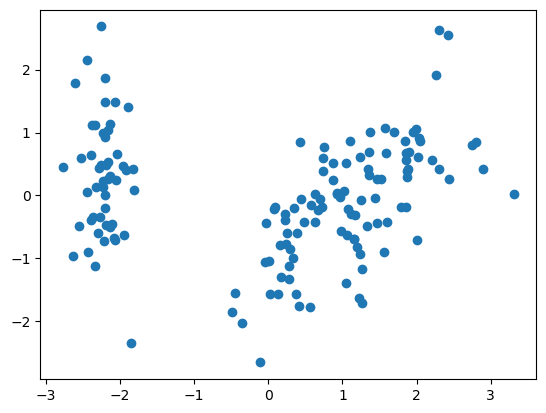

In [13]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

### Training the dataset

Text(0, 0.5, 'Encludian Distance')

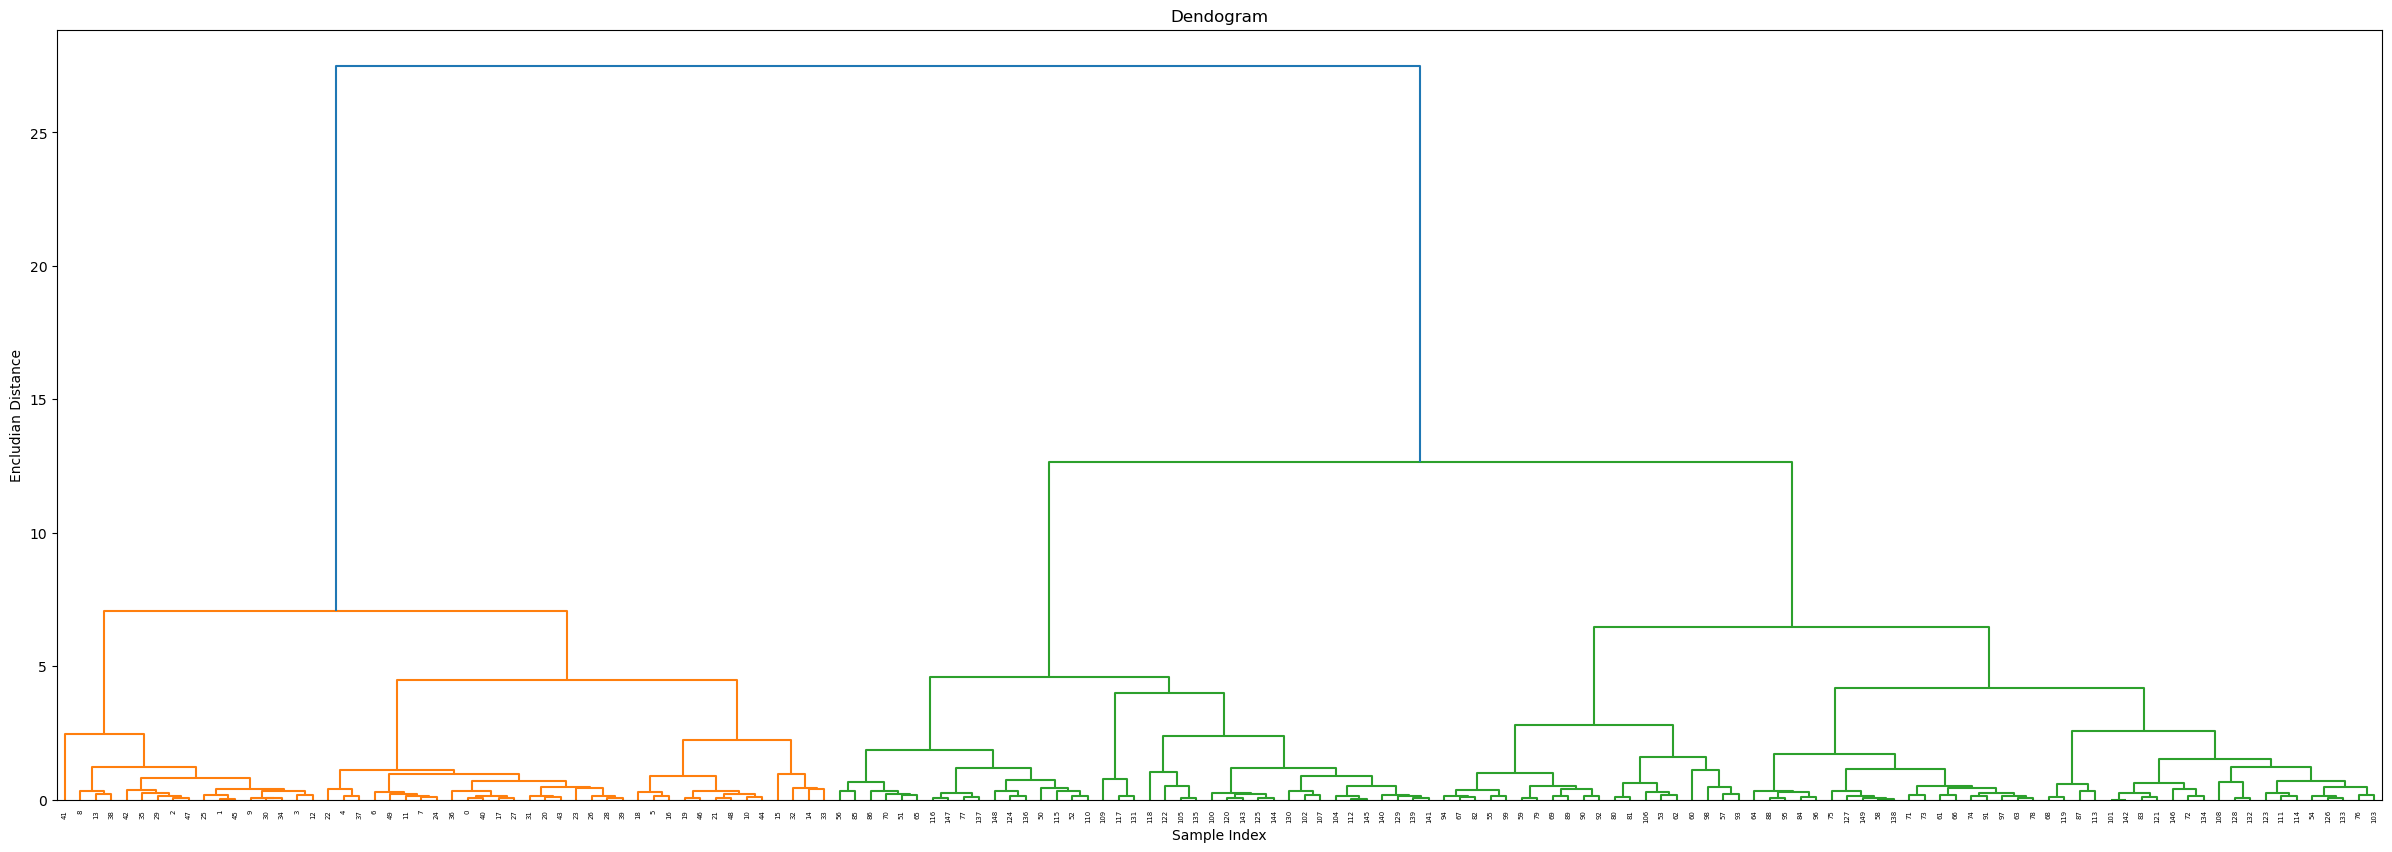

In [14]:
# Aglometric Clustering
# To construct a dendogram
plt.figure(figsize=(30,10))
from scipy.cluster import hierarchy as sc

# Create Dendogram
sc.dendrogram(sc.linkage(pca_scaled,method="ward"))
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Encludian Distance")

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2)
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [16]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

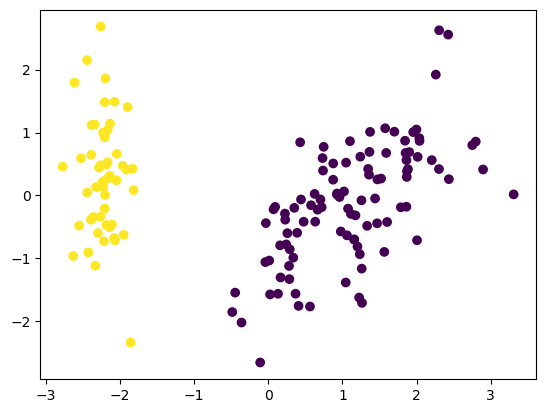

In [17]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c = cluster.labels_)

#### Silhouette Score

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_coef = []

for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k,linkage="ward")
    agglo.fit(x_scaled)
    score = silhouette_score(x_scaled,agglo.labels_)
    silhouette_coef.append(score)

In [20]:
max(silhouette_coef)

0.5770346019475988